In [1]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import joblib

random_state = 42

In [2]:
student_data = pd.read_csv('../../data/clean_data_0/student_train_data.csv')
student_data.drop(columns=['id'],inplace=True)

student_x_data = student_data.drop(columns=['Depression'])
student_y_data = student_data['Depression']

student_x_train, student_x_test, student_y_train, student_y_test = train_test_split(student_x_data, student_y_data, test_size=0.3, random_state=42)

In [3]:
student_grad_boost_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_depth=1, random_state=random_state).fit(student_x_train, student_y_train)
student_grad_boost_clf.score(student_x_test, student_y_test)


0.8402869097429767

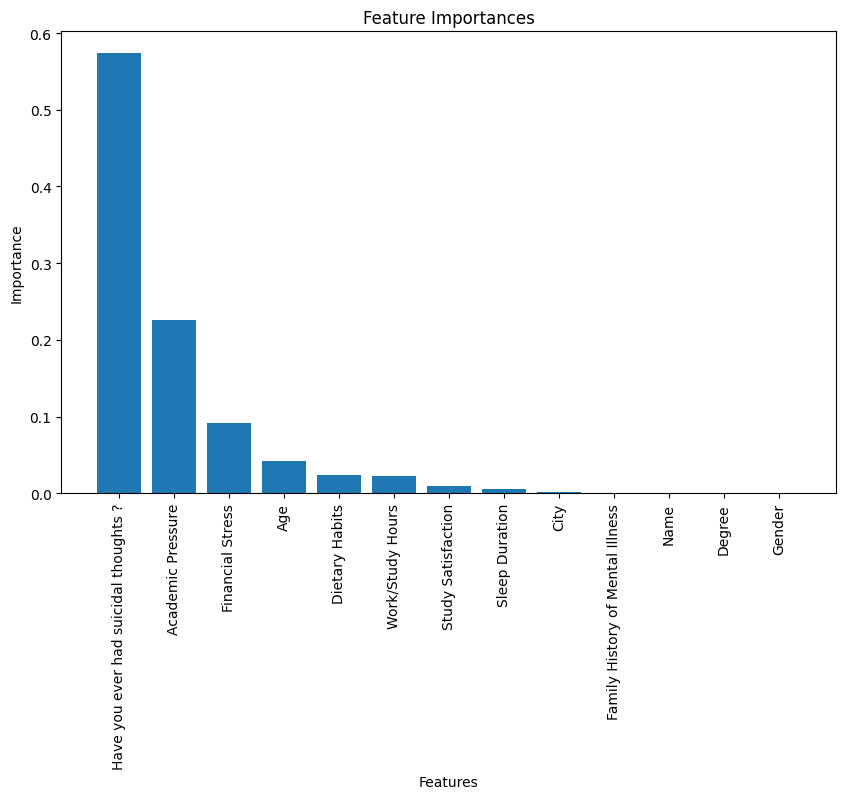

In [4]:
importances = student_grad_boost_clf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [student_data.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(student_x_train.shape[1]), importances[indices])
plt.xticks(range(student_x_train.shape[1]), names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [5]:
joblib.dump(student_grad_boost_clf, "student_grad_boost_clf.pkl") 

['student_grad_boost_clf.pkl']

In [6]:
prof_data = pd.read_csv('../../data/clean_data_0/prof_train_data.csv')
prof_data.drop(columns=['id'],inplace=True)

prof_x_data = prof_data.drop(columns=['Depression'])
prof_y_data = prof_data['Depression']

prof_x_train, prof_x_test, prof_y_train, prof_y_test = train_test_split(prof_x_data, prof_y_data, test_size=0.3, random_state=42)

In [7]:
prof_grad_boost_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_depth=1, random_state=random_state).fit(prof_x_train, prof_y_train)
prof_grad_boost_clf.score(prof_x_test, prof_y_test)


0.9164080281398718

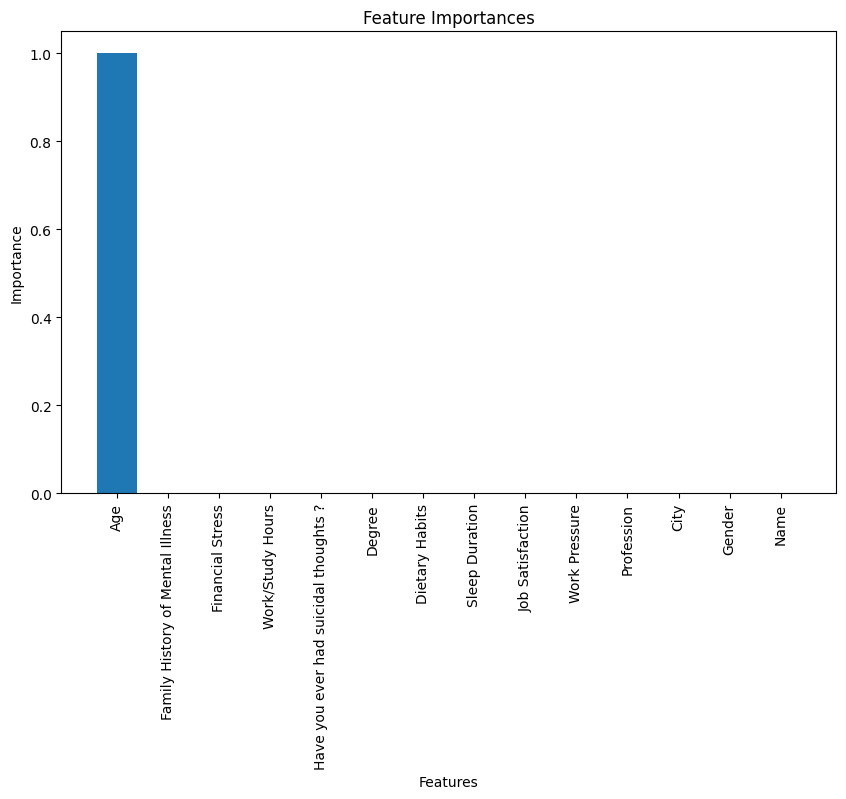

In [8]:
importances = prof_grad_boost_clf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [prof_data.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(prof_x_data.shape[1]), importances[indices])
plt.xticks(range(prof_x_data.shape[1]), names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [13]:
joblib.dump(prof_grad_boost_clf, "prof_grad_boost_clf.pkl") 


['prof_grad_boost_clf.pkl']